In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [3]:
ruta_absoluta = 'C:/Users/Usuario/Desktop/Proyecto telecomunicaciones'
# Patrón de archivos CSV en la carpeta
patron = f'{ruta_absoluta}/*.csv'

# Buscar archivos que coinciden con el patrón
archivos_csv = glob.glob(patron)
dataframes = {}  # Diccionario para almacenar los DataFrames


In [7]:
for archivo in archivos_csv:
        # Obtener el nombre del archivo sin la ruta ni la extensión, convertirlo en minúsculas y reemplazar los espacios por guiones bajos
        nombre_archivo = os.path.basename(archivo).split('.')[0].lower().replace(' ', '_')
        # Leer el archivo CSV y convertirlo en DataFrame
        df = pd.read_csv(archivo)
        # Asignar el DataFrame al nombre del archivo en el diccionario
        dataframes[nombre_archivo] = df

    # Asignar los DataFrames a variables separadas de forma automática
for nombre_archivo, df in dataframes.items():
        # Asignar el DataFrame a una variable con el nombre correspondiente en minúsculas
    globals()[nombre_archivo] = df


In [5]:
acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.head(4)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146


In [6]:
acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [7]:
acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[['Año', 'Trimestre', 'Provincia']] = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[['Año', 'Trimestre', 'Provincia']].astype('category')

columnas = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 'OTROS']
acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[columnas] = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[columnas].astype(str).apply(lambda x: x.str.replace('.', ''))

In [8]:
columnas = ['+ 1 Mbps - 6 Mbps', '+ 30 Mbps', 'Total']
acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[columnas] = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[columnas].apply(lambda x: x.str.replace('.', ''))

In [9]:
columnas = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[columnas] = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia[columnas].apply(pd.to_numeric, errors='coerce', axis=1)


In [10]:
acceso_a_internet_fijo_por_tecnología_y_provincia.head(4)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146


In [11]:
acceso_a_internet_fijo_por_tecnología_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [12]:
acceso_a_internet_fijo_por_tecnología_y_provincia[['Año', 'Trimestre', 'Provincia']] = acceso_a_internet_fijo_por_tecnología_y_provincia[['Año', 'Trimestre', 'Provincia']].astype('category')

In [13]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Total']
acceso_a_internet_fijo_por_tecnología_y_provincia[columnas] = acceso_a_internet_fijo_por_tecnología_y_provincia[columnas].apply(lambda x: x.str.replace('.', ''))
acceso_a_internet_fijo_por_tecnología_y_provincia[columnas] = acceso_a_internet_fijo_por_tecnología_y_provincia[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [14]:
columnas = ['Wireless',	'Otros']
acceso_a_internet_fijo_por_tecnología_y_provincia[columnas] = acceso_a_internet_fijo_por_tecnología_y_provincia[columnas].astype(str).apply(lambda x: x.str.replace('.', ''))
acceso_a_internet_fijo_por_tecnología_y_provincia[columnas] = acceso_a_internet_fijo_por_tecnología_y_provincia[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [15]:
accesos_a_banda_ancha_y_banda_angosta_por_provincia.head(4)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146


In [16]:
accesos_a_banda_ancha_y_banda_angosta_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [17]:
columnas = ['Año', 'Trimestre', 'Provincia']
accesos_a_banda_ancha_y_banda_angosta_por_provincia[columnas] = accesos_a_banda_ancha_y_banda_angosta_por_provincia[columnas].astype('category')

In [18]:
columnas = ['Banda ancha fija', 'Dial up', 'Total']
accesos_a_banda_ancha_y_banda_angosta_por_provincia[columnas] = accesos_a_banda_ancha_y_banda_angosta_por_provincia[columnas].apply(lambda x: x.str.replace('.', ''))
accesos_a_banda_ancha_y_banda_angosta_por_provincia[columnas] = accesos_a_banda_ancha_y_banda_angosta_por_provincia[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [19]:
accesos_a_internet_fijo_por_tecnología_y_localidad.head(4)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN


In [20]:
accesos_a_internet_fijo_por_tecnología_y_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [21]:
accesos_a_internet_fijo_por_tecnología_y_localidad.drop('Unnamed: 13', axis=1, inplace=True)

In [22]:
columnas = ['Provincia', 'Partido', 'Localidad']
accesos_a_internet_fijo_por_tecnología_y_localidad[columnas] = accesos_a_internet_fijo_por_tecnología_y_localidad[columnas].astype('category')

In [23]:
columnas = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
accesos_a_internet_fijo_por_tecnología_y_localidad[columnas] = accesos_a_internet_fijo_por_tecnología_y_localidad[columnas].replace('- 0', '0')
accesos_a_internet_fijo_por_tecnología_y_localidad[columnas] = accesos_a_internet_fijo_por_tecnología_y_localidad[columnas].apply(lambda x: x.str.replace('.', ''))
accesos_a_internet_fijo_por_tecnología_y_localidad[columnas] = accesos_a_internet_fijo_por_tecnología_y_localidad[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [24]:
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.head(4)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,2 Mbps","1,25 Mbps","1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps","6,7 Mbps",3 Mbps,"3,2 Mbps","3,3 Mbps","3,5 Mbps",4 Mbps,"4,5 Mbps",5 Mbps,6 Mbps,"6,4 Mbps",7 Mbps,"7,5 Mbps",8 Mbps,9 Mbps,10 Mbps,"10,6 Mbps",11 Mbps,12 Mbps,13 Mbps,14 Mbps,15 Mbps,16 Mbps,17 Mbps,18 Mbps,19 Mbps,20 Mbps,21 Mbps,22 Mbps,23 Mbps,24 Mbps,25 Mbps,"25,1 Mbps","25,11 Mbps","25,5 Mbps",26 Mbps,28 Mbps,29 Mbps,30 Mbps,31 Mbps,32 Mbps,34 Mbps,35 Mbps,36 Mbps,37 Mbps,38 Mbps,39 Mbps,40 Mbps,41 Mbps,45 Mbps,46 Mbps,47 Mbps,48 Mbps,49 Mbps,50 Mbps,51 Mbps,52 Mbps,54 Mbps,55 Mbps,56 Mbps,58 Mbps,59 Mbps,60 Mbps,61 Mbps,62 Mbps,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611","23,098",- 0,- 0,351,"24,140",- 0,25,- 0,"60,803",- 0,- 0,"41,976","13,774",65,"33,037","116,144",- 0,"11,016",756,"70,240",275,"215,628",- 0,10,"30,241",128,33,"85,776",301,2,"15,011",- 0,"135,542",3,1,18,25,"68,558",- 0,- 0,- 0,- 0,- 0,- 0,"774,648","1,610",7,1,873,- 0,- 0,- 0,- 0,"3,307",9,- 0,- 0,- 0,- 0,1,"959,569",- 0,- 0,- 0,58,- 0,1,59,"405,103",78,1,- 0,- 0,14,- 0,- 0,- 0,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307","4,435",- 0,- 0,- 0,329,- 0,- 0,- 0,"4,539",- 0,- 0,"11,975",991,- 0,"3,363","13,174",- 0,7,- 0,"16,652",3,"51,167",- 0,5,"3,423",- 0,- 0,"29,793",5,- 0,"11,880",- 0,"6,840",1,- 0,- 0,- 0,"22,894",- 0,- 0,- 0,- 0,- 0,- 0,"58,853",- 0,- 0,- 0,9,- 0,- 0,- 0,30,122,- 0,- 0,- 0,- 0,- 0,- 0,"361,025",- 0,- 0,- 0,1,- 0,- 0,- 0,"97,849",- 0,- 0,- 0,- 0,- 0,1,- 0,- 0,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,384,- 0,- 0,- 0,115,- 0,- 0,- 0,"1,147",- 0,- 0,- 0,- 0,- 0,18,"1,827",- 0,2,- 0,- 0,- 0,"5,387",- 0,- 0,637,- 0,- 0,776,- 0,- 0,- 0,- 0,"3,686",- 0,- 0,- 0,"2,622",210,- 0,- 0,- 0,- 0,- 0,- 0,905,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,"31,597",- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,876,- 0,25,- 0,780,- 0,- 0,- 0,"4,445",- 0,- 0,167,385,- 0,"3,638","7,342",- 0,106,- 0,700,1,"18,131",- 0,- 0,"2,110",- 0,- 0,"1,776",- 0,- 0,188,- 0,"3,975",- 0,- 0,- 0,- 0,"1,438",- 0,- 0,- 0,- 0,- 0,- 0,"14,401",- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,18,- 0,- 0,- 0,- 0,- 0,- 0,"45,596",- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [25]:
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         480 non-null    float64
 1   Trimestre   480 non-null    float64
 2   Provincia   480 non-null    object 
 3   Otros       480 non-null    object 
 4   0,256 Mbps  480 non-null    object 
 5   0,375 Mbps  480 non-null    object 
 6   0,625 Mbps  480 non-null    object 
 7   0,5 Mbps    480 non-null    object 
 8   0,512 Mbps  480 non-null    object 
 9   0,75 Mbps   480 non-null    object 
 10  1 Mbps      480 non-null    object 
 11  1,2 Mbps    480 non-null    object 
 12  1,25 Mbps   480 non-null    object 
 13  1,5 Mbps    480 non-null    object 
 14  2 Mbps      480 non-null    object 
 15  2,2 Mbps    480 non-null    object 
 16  2,5 Mbps    481 non-null    object 
 17  6,7 Mbps    480 non-null    object 
 18  3 Mbps      480 non-null    object 
 19  3,2 Mbps    480 non-null    o

In [26]:
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[['Año', 'Trimestre']] = accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[['Año', 'Trimestre']].astype('Int64')
columnas = ['Año', 'Trimestre', 'Provincia']
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas] = accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas].astype('category')

In [27]:
columnas = ['Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
       '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
       '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps',
       '82 Mbps', '86 Mbps']

accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas] = accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas].replace('- 0', '0')
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas] = accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas].apply(lambda x: x.str.replace(',', ''))
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas] = accesos_a_internet_fijo_por_velocidad_bajada_y_provincia[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [28]:
accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.head(4)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",1 mbps,"1,25 mbps","1,5 mbps",2 mbps,"2,2 mbps","2,5 mbps",3 mbps,"3,3 mbps","3,5 mbps",4 mbps,"4,5 mbps",5 mbps,6 mbps,"6,4 mbps",7 mbps,"7,5 mbps",8 mbps,9 mbps,10 mbps,11 mbps,12 mbps,13 mbps,14 mbps,15 mbps,16 mbps,17 mbps,18 mbps,19 mbps,20 mbps,21 mbps,22 mbps,23 mbps,24 mbps,25 mbps,"25,1 mbps","25,11 mbps","25,5 mbps",26 mbps,30 mbps,31 mbps,32 mbps,34 mbps,35 mbps,36 mbps,38 mbps,39 mbps,40 mbps,41 mbps,45 mbps,46 mbps,49 mbps,50 mbps,55 mbps,58 mbps,59 mbps,60 mbps,61 mbps,62 mbps,64 mbps,65 mbps,66 mbps,70 mbps,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN,145,NaN,NaN,NaN,173,NaN,NaN,NaN,299,NaN,144,NaN,"4,134",NaN,NaN,415,NaN,NaN,NaN,NaN,604,NaN,NaN,NaN,NaN,211,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [30]:
columnas = ['Provincia', 'Partido', 'Localidad']
accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad[columnas] = accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad[columnas].astype('category')

In [31]:
columnas = ['Otros', '0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps', '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps', '2,5 mbps', '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps', '5 mbps', '6 mbps', '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps', '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', '14 mbps', '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps', '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps', '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps', '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps', '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps', '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps', '65 mbps', '66 mbps', '70 mbps', '75 mbps', '78 mbps', '80 mbps', '82 mbps', '83 mbps', '85 mbps', '90 mbps', '92 mbps', '95 mbps', '100 mbps']
accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad[columnas] = accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad[columnas].apply(pd.to_numeric, errors='coerce', axis=1)
accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad[columnas] = accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad[columnas].fillna(0)

In [19]:
conectividad_al_servicio_de_internet.head(10)

,Provincia,Partido,Localidad,Población,ADSL,CABLEMODEM,DIALUP,Fibra Óptica,Satelital,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud
0,NaN,Bahía Blanca,Villa Bordeau,0.0,0,--,--,--,0,--,--,0,SI,"-38,6472605094596",NaN
1,BUENOS AIRES,NaN,NaN,0.0,--,0,0,--,--,0,0,--,--,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,NaN,Balcarce,38376.0,SI,0,SI,SI,--,0,0,SI,SI,NaN,"-58,2551665841248"
3,BUENOS AIRES,NaN,NaN,337.0,--,0,0,--,--,0,SI,0,--,"-37,9412057603",NaN
4,BUENOS AIRES,Balcarce,NaN,374.0,--,--,0,SI,--,SI,SI,SI,0,"-37,6254980210026","-58,7461862359423"
5,NaN,Balcarce,Ramos Otero,95.0,0,--,--,--,0,SI,0,--,SI,NaN,"-58,3407185507274"
6,BUENOS AIRES,Balcarce,San Agustín,0.0,--,--,--,0,--,SI,0,--,--,NaN,"-58,355377761682"
7,BUENOS AIRES,Balcarce,NaN,115.0,--,--,0,--,--,SI,SI,SI,0,"-37,8596285282151","-57,9806008736401"
8,BUENOS AIRES,NaN,NaN,28537.0,SI,0,0,SI,SI,0,SI,0,SI,"-33,8128781547156",NaN
9,NaN,Baradero,Irineo Portela,0.0,0,--,--,0,SI,SI,0,--,--,NaN,"-59,6715601606315"


In [14]:
conectividad_al_servicio_de_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Provincia      2871 non-null   category
 1   Partido        2866 non-null   category
 2   Localidad      2884 non-null   category
 3   Población      4312 non-null   float64 
 4   ADSL           4312 non-null   object  
 5   CABLEMODEM     4312 non-null   object  
 6   DIALUP         4312 non-null   object  
 7   Fibra Óptica   4312 non-null   object  
 8   Satelital      4312 non-null   object  
 9   WIRELESS       4312 non-null   object  
 10  TELEFONIAFIJA  4312 non-null   object  
 11  3G             4312 non-null   object  
 12  4G             4312 non-null   object  
 13  link           2865 non-null   float64 
 14  Latitud        2872 non-null   object  
 15  Longitud       2879 non-null   object  
dtypes: category(3), float64(2), object(11)
memory usage: 564.8+ KB


In [6]:
conectividad_al_servicio_de_internet['Unnamed: 7'] = conectividad_al_servicio_de_internet['Unnamed: 7'].astype('str')

In [18]:
conectividad_al_servicio_de_internet.drop('link', axis=1, inplace=True)

In [10]:
conectividad_al_servicio_de_internet.rename(columns={'Unnamed: 15': 'Longitud', 'Unnamed: 0': 'Provincia', 'Unnamed: 3': 'Población', 'Unnamed: 4': 'ADSL', 'Unnamed: 7': 'Fibra Óptica', 'Unnamed: 8': 'Satelital', 'Unnamed: 11': '3G', 'Unnamed: 12': '4G'}, inplace=True)
columnas = ['Provincia', 'Partido', 'Localidad']
conectividad_al_servicio_de_internet[columnas] = conectividad_al_servicio_de_internet[columnas].astype('category')

In [13]:
columnas = ['Población', 'ADSL', 'CABLEMODEM', 'DIALUP', 'Fibra Óptica', 'Satelital', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G']
conectividad_al_servicio_de_internet[columnas] = conectividad_al_servicio_de_internet[columnas].fillna(0)

In [37]:
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad.head(4)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN


In [38]:
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


In [39]:
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad.drop('Unnamed: 11', axis=1, inplace=True)

In [40]:
columnas = ['Año', 'Trimestre']
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas] = distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas].astype('category')

In [41]:
columnas = ['Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Total']
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas] = distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas].apply(lambda x: x.str.replace('.', ''))
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas] = distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [42]:
columnas = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'OTROS']
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas] = distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas].astype(str).apply(lambda x: x.str.replace('.', '',))
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas] = distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [43]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.head(4)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021


In [44]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [45]:
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.drop('Periodo', axis=1, inplace=True)

ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo['Ingresos (miles de pesos)'] = ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo['Ingresos (miles de pesos)'].str.replace('.', '')
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo['Ingresos (miles de pesos)'] = ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo['Ingresos (miles de pesos)'].apply(pd.to_numeric, errors='coerce')

columnas = ['Año', 'Trimestre']
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo[columnas] = ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo[columnas].astype('category')

In [46]:
listado_de_localidades_con_conectividad_a_internet.head(4)

,Unnamed: 0,Partido,Localidad,ADSL,Unnamed: 4,DIALUP,FIBRAOPTICA,4G,Unnamed: 8,TELEFONIAFIJA,Unnamed: 10,SATELITAL
0,NaN,Bahía Blanca,Villa Bordeau,NaN,NaN,--,--,NaN,NaN,--,NaN,--
1,BUENOS AIRES,NaN,Villa Espora,--,--,NaN,--,--,--,NaN,--,NaN
2,BUENOS AIRES,NaN,NaN,SI,SI,NaN,NaN,SI,SI,NaN,SI,NaN
3,BUENOS AIRES,Balcarce,NaN,--,--,--,NaN,--,--,SI,SI,--


In [47]:
listado_de_localidades_con_conectividad_a_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2876 non-null   object
 1   Partido        2880 non-null   object
 2   Localidad      2866 non-null   object
 3   ADSL           2868 non-null   object
 4   Unnamed: 4     2876 non-null   object
 5   DIALUP         2888 non-null   object
 6   FIBRAOPTICA    2868 non-null   object
 7   4G             2862 non-null   object
 8   Unnamed: 8     2881 non-null   object
 9   TELEFONIAFIJA  2885 non-null   object
 10  Unnamed: 10    2868 non-null   object
 11  SATELITAL      2878 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


In [48]:
listado_de_localidades_con_conectividad_a_internet.rename({'Unnamed: 0': 'Provincia'}, axis=1, inplace=True)

In [49]:
columnas = ['Provincia', 'Partido', 'Localidad']
listado_de_localidades_con_conectividad_a_internet[columnas] = listado_de_localidades_con_conectividad_a_internet[columnas].astype('category')

In [50]:
penetración_de_internet_fijo_accesos_por_cada_100_hogares.head(4)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"


In [51]:
penetración_de_internet_fijo_accesos_por_cada_100_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [52]:
columnas = ['Año', 'Trimestre', 'Provincia']
penetración_de_internet_fijo_accesos_por_cada_100_hogares[columnas] = penetración_de_internet_fijo_accesos_por_cada_100_hogares[columnas].astype('category')

In [53]:
penetración_de_internet_fijo_accesos_por_cada_100_hogares['Accesos por cada 100 hogares'] = penetración_de_internet_fijo_accesos_por_cada_100_hogares['Accesos por cada 100 hogares'].replace(',', '.', regex=True)
penetración_de_internet_fijo_accesos_por_cada_100_hogares['Accesos por cada 100 hogares'] = penetración_de_internet_fijo_accesos_por_cada_100_hogares['Accesos por cada 100 hogares'].apply(pd.to_numeric, errors='coerce')

In [54]:
penetración_por_hogares_nacional_de_internet_fijo.head(4)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021


In [55]:
penetración_por_hogares_nacional_de_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [56]:
penetración_por_hogares_nacional_de_internet_fijo.drop('Periodo', axis=1, inplace=True)

In [57]:
columnas = ['Año', 'Trimestre']
penetración_por_hogares_nacional_de_internet_fijo[columnas] = penetración_por_hogares_nacional_de_internet_fijo[columnas].astype('category')

In [58]:
columnas = ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
penetración_por_hogares_nacional_de_internet_fijo[columnas] = penetración_por_hogares_nacional_de_internet_fijo[columnas].replace(',', '.', regex=True)
penetración_por_hogares_nacional_de_internet_fijo[columnas] = penetración_por_hogares_nacional_de_internet_fijo[columnas].apply(pd.to_numeric, errors='coerce', axis=1)


In [59]:
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.head(4)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021


In [60]:
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [61]:
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.drop('Periodo', axis=1, inplace=True)

In [62]:
columnas = ['Año', 'Trimestre']
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas] = serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas].astype('category')

In [63]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Total']
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas] = serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas].apply(lambda x: x.str.replace('.', ''))
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas] = serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [64]:
columnas = ['Wireless', 'Otros']
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas] = serie_trimestral_de_accesos_a_internet_fijo_por_tecnología[columnas].astype(str).apply(lambda x: x.str.replace('.', '',)).astype(int)

In [65]:
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral.head(4)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021


In [66]:
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [67]:
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral.drop('Periodo', axis=1, inplace=True)

In [68]:
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral[['Año', 'Trimestre']] = total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral[['Año', 'Trimestre']].astype('category')

In [69]:
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Dial up'] = total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Dial up'].astype(str).apply(lambda x: x.replace('.', ''))
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Dial up'] = total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral['Dial up'].apply(pd.to_numeric, errors='coerce')

In [70]:
columnas = ['Banda ancha fija', 'Total']
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral[columnas] = total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral[columnas].apply(lambda x: x.str.replace('.', ''))
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral[columnas] = total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral[columnas].apply(pd.to_numeric, errors='coerce', axis=1)

In [71]:
velocidad_media_de_bajada_de_internet_fijo_por_provincia.head(4)

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN


In [72]:
velocidad_media_de_bajada_de_internet_fijo_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [73]:
columnas_a_eliminar = ['Unnamed: 4', 'Unnamed: 5']
velocidad_media_de_bajada_de_internet_fijo_por_provincia.drop(columnas_a_eliminar, axis=1, inplace=True)

In [74]:
columnas = ['Año', 'Trimestre', 'Provincia']
velocidad_media_de_bajada_de_internet_fijo_por_provincia[columnas] = velocidad_media_de_bajada_de_internet_fijo_por_provincia[columnas].astype('category')

In [75]:
velocidad_media_de_bajada_de_internet_fijo.head(4)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021


In [76]:
velocidad_media_de_bajada_de_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [77]:
velocidad_media_de_bajada_de_internet_fijo.drop('Trimestre.1', axis=1, inplace=True)

columnas = ['Año', 'Trimestre']
velocidad_media_de_bajada_de_internet_fijo[columnas] = velocidad_media_de_bajada_de_internet_fijo[columnas].astype('category')

velocidad_media_de_bajada_de_internet_fijo['Mbps (Media de bajada)'] = velocidad_media_de_bajada_de_internet_fijo['Mbps (Media de bajada)'].str.replace(',', '.', regex=True)
velocidad_media_de_bajada_de_internet_fijo['Mbps (Media de bajada)'] = velocidad_media_de_bajada_de_internet_fijo['Mbps (Media de bajada)'].apply(pd.to_numeric, errors='coerce')

In [78]:
"""acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.to_csv('Data limpia/acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.csv', index=False)
acceso_a_internet_fijo_por_tecnología_y_provincia.to_csv('Data limpia/acceso_a_internet_fijo_por_tecnología_y_provincia.csv', index=False)
accesos_a_banda_ancha_y_banda_angosta_por_provincia.to_csv('Data limpia/accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv', index=False)
accesos_a_internet_fijo_por_tecnología_y_localidad.to_csv('Data limpia/accesos_a_internet_fijo_por_tecnología_y_localidad.csv', index=False)
accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.to_csv('Data limpia/accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.csv', index=False)
accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.to_csv('Data limpia/accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.csv', index=False)
conectividad_al_servicio_de_internet.to_csv('Data limpia/conectividad_al_servicio_de_internet.csv', index=False)
distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad.to_csv('Data limpia/distribución_de_los_accesos_totales_nacionales_a_internet_fijo_por_velocidad.csv', index=False)
ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.to_csv('Data limpia/ingresos_trimestrales_por_la_prestación_del_servicio_de_internet_fijo.csv', index=False)
listado_de_localidades_con_conectividad_a_internet.to_csv('Data limpia/listado_de_localidades_con_conectividad_a_internet.csv', index=False)
penetración_de_internet_fijo_accesos_por_cada_100_hogares.to_csv('Data limpia/penetración_de_internet_fijo_accesos_por_cada_100_hogares.csv', index=False)
penetración_por_hogares_nacional_de_internet_fijo.to_csv('Data limpia/penetración_por_hogares_nacional_de_internet_fijo.csv', index=False)
serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.to_csv('Data limpia/serie_trimestral_de_accesos_a_internet_fijo_por_tecnología.csv', index=False)
total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral.to_csv('Data limpia/total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta_trimestral.csv', index=False)
velocidad_media_de_bajada_de_internet_fijo_por_provincia.to_csv('Data limpia/velocidad_media_de_bajada_de_internet_fijo_por_provincia.csv', index=False)
velocidad_media_de_bajada_de_internet_fijo.to_csv('Data limpia/velocidad_media_de_bajada_de_internet_fijo.csv', index=False)"""

"acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.to_csv('Data limpia/acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.csv', index=False)\nacceso_a_internet_fijo_por_tecnología_y_provincia.to_csv('Data limpia/acceso_a_internet_fijo_por_tecnología_y_provincia.csv', index=False)\naccesos_a_banda_ancha_y_banda_angosta_por_provincia.to_csv('Data limpia/accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv', index=False)\naccesos_a_internet_fijo_por_tecnología_y_localidad.to_csv('Data limpia/accesos_a_internet_fijo_por_tecnología_y_localidad.csv', index=False)\naccesos_a_internet_fijo_por_velocidad_bajada_y_provincia.to_csv('Data limpia/accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.csv', index=False)\naccesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.to_csv('Data limpia/accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.csv', index=False)\nconectividad_al_servicio_de_internet.to_csv('Data limpia/conectividad_al_servicio

In [1]:
# Agrupar los datos por año y rango de velocidad y calcular el promedio o suma deseada
data_grouped = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.groupby('Año')[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].sum()

# Definir una paleta de colores continua
cmap = plt.get_cmap('inferno')

# Trazar el gráfico de líneas asignando un color a cada rango de velocidad
for i, col in enumerate(data_grouped.columns):
    plt.plot(data_grouped.index, data_grouped[col], marker='o', color=cmap(i/len(data_grouped.columns)))

plt.xlabel('Año')
plt.ylabel('Recuento o porcentaje')
plt.title('Evolución del acceso a internet fijo por rango de velocidad')

# Personalizar el estilo con Seaborn
sns.despine()  # Quitar los bordes de la gráfica

# Crear una leyenda con las etiquetas de velocidad
handles = [plt.Line2D([], [], color=cmap(i/len(data_grouped.columns)), marker='o') for i in range(len(data_grouped.columns))]
labels = data_grouped.columns
plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

NameError: name 'acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia' is not defined

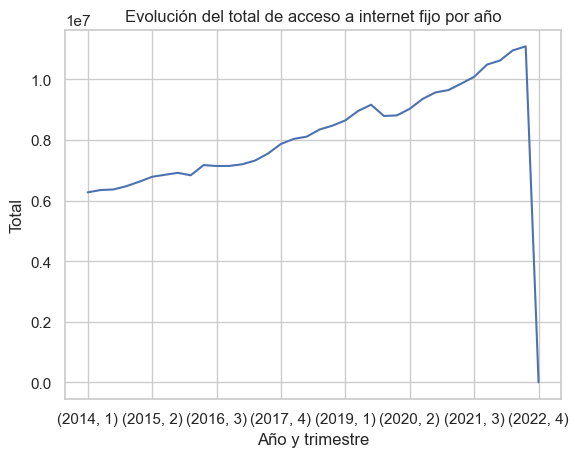

In [80]:
# Agrupar los datos por año y calcular la suma del total
data_grouped = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.groupby(['Año', 'Trimestre'])['Total'].sum()

# Trazar el gráfico de línea de la evolución del total
data_grouped.plot.line()#(kind='line', marker='o')

plt.xlabel('Año y trimestre')
plt.ylabel('Total')
plt.title('Evolución del total de acceso a internet fijo por año')

plt.show()

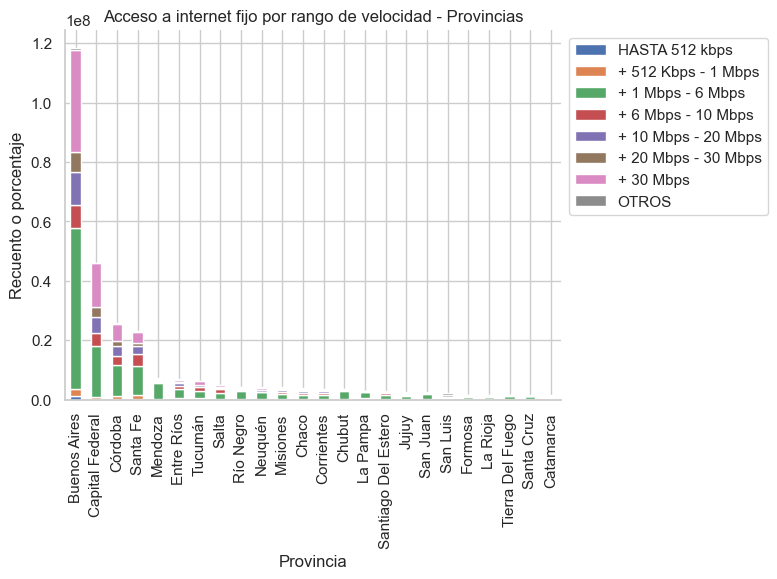

In [81]:
# Agrupar los datos por provincia y calcular el recuento o porcentaje deseado
data_grouped = acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.groupby('Provincia')[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].sum()

# Convertir las columnas en una lista de cadenas de texto
data_columns = list(data_grouped.columns)

# Ordenar las barras de cada provincia de mayor a menor
data_grouped_sorted = data_grouped.loc[data_grouped.sum(axis=1).sort_values(ascending=False).index, data_columns]

# Convertir el índice categórico en una lista de cadenas de texto
data_grouped_sorted = data_grouped_sorted.reset_index()

# Trazar el gráfico de barras apiladas con las barras ordenadas
data_grouped_sorted.plot(kind='bar', stacked=True, x='Provincia')

plt.xlabel('Provincia')
plt.ylabel('Recuento o porcentaje')
plt.title('Acceso a internet fijo por rango de velocidad - Provincias')

# Personalizar el estilo con Seaborn
sns.despine()
sns.set_palette("colorblind")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
